# LSTM con una variable

Se importan las librerías.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Se importan los datos de Cuenca.

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')

Se obtienen los datos en el horario de interés.

In [ ]:
df = df.between_time('08:00:00','17:00:00')

In [ ]:
df

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,96.0,89.0,0.0,743.5,743.7,743.1,2.5,4.6,42
2015-01-01 09:00:00,394.0,15.1,12.2,89.0,76.0,0.0,743.8,743.9,743.7,3.3,5.8,59
2015-01-01 10:00:00,728.0,18.1,15.1,79.0,57.0,0.0,743.7,743.9,743.4,4.4,8.4,40
2015-01-01 11:00:00,428.0,18.4,16.7,66.0,58.0,0.0,743.2,743.4,742.8,4.0,8.1,35
2015-01-01 12:00:00,403.0,18.5,17.2,65.0,55.0,0.0,742.6,742.9,742.3,3.5,7.6,34
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-07 13:00:00,370.0,18.0,14.2,84.0,63.0,0.2,744.3,744.8,744.1,4.5,11.1,30
2016-08-07 14:00:00,364.0,17.5,14.0,87.0,72.0,0.0,743.9,744.2,743.5,4.3,12.1,28
2016-08-07 15:00:00,331.0,18.0,15.3,81.0,64.0,0.0,743.4,743.6,743.0,3.3,11.0,23


Se obtienen las variables de interés.

In [ ]:
df = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]

In [ ]:
df.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,WS1HX,WS1HA,RHMIN1H,RHMAX1H
Local_Time,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,4.6,2.5,89.0,96.0
2015-01-01 09:00:00,394.0,15.1,12.2,5.8,3.3,76.0,89.0
2015-01-01 10:00:00,728.0,18.1,15.1,8.4,4.4,57.0,79.0
2015-01-01 11:00:00,428.0,18.4,16.7,8.1,4.0,58.0,66.0
2015-01-01 12:00:00,403.0,18.5,17.2,7.6,3.5,55.0,65.0


Se importan los datos de testing.

In [ ]:
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)
df_test = df_test.asfreq('h')

In [ ]:
df_test = df_test[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]
df_test = df_test.between_time('08:00:00','17:00:00')

In [ ]:
df_test.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,WS1HX,WS1HA,RHMIN1H,RHMAX1H
Local_Time,,,,,,,
2016-08-08 08:00:00,136.0,12.2,10.8,6.2,3.2,89.0,95.0
2016-08-08 09:00:00,337.0,15.2,12.3,7.8,3.4,73.0,90.0
2016-08-08 10:00:00,303.0,15.1,13.6,10.1,4.2,70.0,81.0
2016-08-08 11:00:00,549.0,16.5,13.3,9.6,4.8,71.0,88.0
2016-08-08 12:00:00,577.0,17.6,15.8,12.8,5.5,65.0,77.0


Se toma la serie de tiempo de la radiación solar global.

In [ ]:
RSG = df['SRGLOAVG1H'].values

In [ ]:
RSG = np.reshape(RSG,(-1,1))

In [ ]:
RSG[:5]

array([[107.],
       [394.],
       [728.],
       [428.],
       [403.]])

In [ ]:
RSG_test = df_test['SRGLOAVG1H'].values
RSG_test = np.reshape(RSG_test,(-1,1))

Se normalizan los datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(RSG)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(RSG)
scaled_test = scaler.transform(RSG_test)

In [ ]:
scaled_train[0]

array([0.08036454])

Se importa una librería para generar batches de entrenamiento.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Se definen los batches para el entrenamiento.

In [ ]:
n_input = 20 # horas hacia atrás
n_features = 0 # variables exógenas
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]

In [ ]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.08036454 0.31814416 0.5948633  0.34631317 0.32560066 0.57912179
 0.32062966 0.48384424 0.24689312 0.10439105 0.07207954 0.08947804
 0.17978459 0.32974316 0.55012428 0.37199669 0.30405965 0.24192212
 0.24855012 0.23860812]
Predicción: 
 [[0.18061309]]


## Creación del modelo

Se importan las librerías para manejo de redes neuronales

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Se define el modelo.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features+1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Se puede observar que el error se estabiliza a partir de la séptima época

In [ ]:
# fit model
model.fit(generator,epochs=15)

Epoch 1/15
5830/5830 [==============================] - 76s 12ms/step - loss: 0.0231
Epoch 2/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0168
Epoch 3/15
5830/5830 [==============================] - 49s 8ms/step - loss: 0.0162
Epoch 4/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0158
Epoch 5/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0157
Epoch 6/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0156
Epoch 7/15
5830/5830 [==============================] - 46s 8ms/step - loss: 0.0154
Epoch 8/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0153
Epoch 9/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0153
Epoch 10/15
5830/5830 [==============================] - 46s 8ms/step - loss: 0.0152
Epoch 11/15
5830/5830 [==============================] - 47s 8ms/step - loss: 0.0151
Epoch 12/15
5830/5830 [==============================] - 46s 8ms/step - l

La reducción de error más importante se da en las primeras 5 épocas.

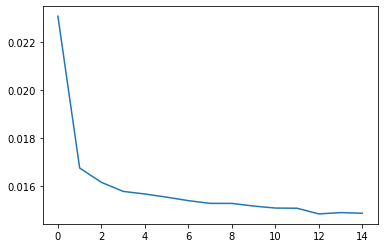

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
X.shape

(1, 12, 1)

Necesitaremos las últimas 12 horas del conjunto de entrenamiento para predecir la primera hora en el conjunto de prueba


In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.35211268],
       [0.14001657],
       [0.06130903],
       [0.11019056],
       [0.21789561],
       [0.46478873],
       [0.49047225],
       [0.29826015],
       [0.29328915],
       [0.26594863],
       [0.26843413],
       [0.10107705]])

In [ ]:
first_eval_batch.shape

(12, 1)

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features+1))

In [ ]:
first_eval_batch.shape

(1, 12, 1)

Valor predicho y valor real.

In [ ]:
model.predict(first_eval_batch)[0]

array([0.09088302], dtype=float32)

In [ ]:
scaled_test[0]

array([0.10439105])

Se obtienen predicciones para una semana.

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))

for i in range(12*7):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
df_plot = pd.DataFrame()

In [ ]:
df_plot['RSG'] =  df_test['SRGLOAVG1H'][:12*7]

In [ ]:
df_plot['predictions'] = true_predictions

Se grafican las predicciones de una semana.

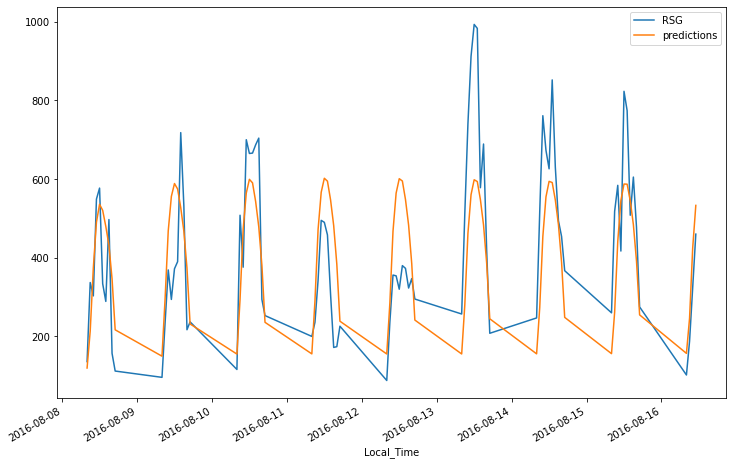

In [ ]:
df_plot.plot(figsize=(12,8))

### Evaluación del modelo

Se obtienen valores predichos para todo el conjunto de pruebas.

In [ ]:
predictions = []

In [ ]:
for i in range(12,len(df_test)):
  model_input = scaled_test[i-12:i]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])

In [ ]:
predictions[:5]

[array([0.31834394], dtype=float32),
 array([0.37483808], dtype=float32),
 array([0.3302368], dtype=float32),
 array([0.34357017], dtype=float32),
 array([0.32537445], dtype=float32)]

In [ ]:
predictions = np.ndarray.flatten(np.array(predictions))

In [ ]:
len(predictions)

1448

In [ ]:
len(df_test)

1460

In [ ]:
predictions = predictions.reshape(-1,1)

Se obtienen los valores reales de la predicción a partir de los datos normalizados.

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
true_predictions[:5]

array([[394.24115],
       [462.4296 ],
       [408.59583],
       [424.6892 ],
       [402.727  ]], dtype=float32)

In [ ]:
true_values = np.ndarray.flatten(df_test.iloc[12:]['SRGLOAVG1H'].values)

In [ ]:
len(true_values)

1448

Se calcula el error MSE.

In [ ]:
mean_squared_error(true_values,true_predictions)

27025.09416820293

De esta manera, se puede comparar qué tan bien lo hace este modelo respecto a otras alternativas.

## Búsqueda de los mejores parámetros para el modelo

Se deben optimizar los hiperparámetros para que un modelo de redes neuronales obtenga los mejores resultados.

Esta función permite crear un modelo que considere varias capas LSTM y distinto número de neuronas.

In [ ]:
def create_Model(n_input, LSTM_neurons = 100, layers=3,n_features=0):
  # define model
  model = Sequential()
  if(layers>1):
    model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1),return_sequences=True))
    for i in range(layers-2):
        model.add(LSTM(LSTM_neurons, activation='relu',return_sequences=True))
    model.add(LSTM(LSTM_neurons, activation='relu'))
  else:
    model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [ ]:
model = create_Model(10,100,4)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 100)           40800     
                                                                 
 lstm_2 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 282,101
Trainable params: 282,101
Non-trainable params: 0
_________________________________________________________________


### Grid search

Para realizar esta búsqueda se deben probar todas las combinaciones de hiperparámetros.

Se crea una lista en caso de que ya se tengan resultados de combinaciones anteriores. Esto es necesario pues Google Colab tiene períodos de utilización de máximo 12 horas, antes de que el entorno se desconecte. La búsqueda completa puede tardar más de 36 horas.

In [ ]:
combinaciones_anteriores = []

In [ ]:
resultados_anteriores = []

In [ ]:
import json

Los resultados que se generaron antes de que el entorno se desconectara se recuperan en formato json.

In [ ]:
with open("./drive/MyDrive/DatosInvestigacion/resultados_LSTM_univariado_RS.txt",'r') as fp:
    for line in fp:
      resultados_anteriores.append(json.loads(line))

Se crea un DataFrame a partir de los resultados.

In [ ]:
df_resultados_anteriores = pd.DataFrame(resultados_anteriores)

In [ ]:
df_resultados = df_resultados_anteriores

Se sabe el error más pequeño, se busca combinaciones que puedan reducirlo.

In [ ]:
df_resultados[df_resultados['RMSE']==df_resultados['RMSE'].min()]

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE,RMSE
99,22,100,50,1,26136.180967,125.98111,161.666883


In [ ]:
min_RMSE = 161.6668827155882

Se almacenan las combinaciones de hiperparámetros ya sabidas para no ejecutar la búsqueda sobre esas opciones otra vez.

In [ ]:
for i in range(len(df_resultados)):
  combinaciones_anteriores.append((int(df_resultados.iloc[i]['Retrasos']),
                                   int(df_resultados.iloc[i]['Neuronas LSTM']),
                                   int(df_resultados.iloc[i]['Batch size']),
                                   int(df_resultados.iloc[i]['LSTM Layers'])))

Se ejecuta la búsqueda a través de todas las combinaciones posibles. El código de creación y evaluación del modelo es el mismo que se ha presentado arriba.

In [ ]:
for retrasos in range(16,26,2): #hasta dos días y medio hacia el pasado
  for num_neuronas in range(50,126,25): 
    for batch_size in range(50,151,50):
      for num_layers in range(1,4): 
        if((retrasos,num_neuronas,batch_size,num_layers) in combinaciones_anteriores):
          continue
        print({
            'Retrasos':retrasos,
            'Neuronas LSTM':num_neuronas,
            'Batch size':batch_size,
            'LSTM Layers': num_layers
        })
        n_input = retrasos # horas hacia atrás
        n_features = 0 # variables exógenas
        generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  
        model = create_Model(n_input,LSTM_neurons=num_neuronas,layers=num_layers)
        model.fit(generator,epochs=7,verbose=False,batch_size=batch_size)
        predictions = []
        for j in range(n_input,len(df_test)):
          model_input = scaled_test[j-n_input:j]
          model_input = model_input.reshape((1, n_input, n_features+1))
          predictions.append(model.predict(model_input)[0])
        predictions = np.ndarray.flatten(np.array(predictions))  
        true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
        true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
        errorMSE = mean_squared_error(true_values,true_predictions)
        errorMAE = mean_absolute_error(true_values,true_predictions)
        errorMSE = errorMSE
        errorRMSE = np.sqrt(errorMSE)
        if(errorRMSE<min_RMSE):
          print('BEST')
          # se salva el modelo con los mejores resultados
          model.save('./drive/MyDrive/DatosInvestigacion/LSTM_univariado_RS.h5')
          min_RMSE = errorRMSE
        print('RMSE:',errorRMSE)
        print('MAE',errorMAE)
        print('Min RMSE',min_RMSE)

        resultado = {
            'Retrasos':retrasos,
            'Neuronas LSTM':num_neuronas,
            'Batch size':batch_size,
            'LSTM Layers': num_layers,
            'MSE':errorMSE,
            'MAE':errorMAE,
            'RMSE':errorRMSE
        }
        # se salvan los resultados de la combinación actual
        with open("./drive/MyDrive/DatosInvestigacion/resultados_LSTM_univariado_RS.txt","a") as file:
          resultado = json.dumps(resultado)
          file.write(resultado)
          file.write('\n')

{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 50, 'LSTM Layers': 3}
RMSE: 169.86444922499618
MAE 133.33967061898306
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 100, 'LSTM Layers': 1}
RMSE: 171.64717356767
MAE 133.1459484739496
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 100, 'LSTM Layers': 2}
RMSE: 164.17929859746332
MAE 128.9577191688421
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 100, 'LSTM Layers': 3}
RMSE: 169.71536677942592
MAE 132.05090543723074
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 150, 'LSTM Layers': 1}
RMSE: 166.5748816904988
MAE 128.05731858298577
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 150, 'LSTM Layers': 2}
RMSE: 165.5868741504839
MAE 126.78680163132796
Min RMSE 161.6668827155882
{'Retrasos': 22, 'Neuronas LSTM': 125, 'Batch size': 150, 'LSTM Layers': 3}
RMSE: 176.9525863158617
MA

Se puede ver el modelo con el error más pequeño después de toda la búsqueda.

In [ ]:
df_resultados[df_resultados['MSE'] == df_resultados['MSE'].min()]

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE,RMSE
99,22,100,50,1,26136.180967,125.98111,161.666883


In [ ]:
df_resultados[df_resultados['MAE'] == df_resultados['MAE'].min()]

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE,RMSE
76,20,100,100,2,26346.886807,124.699381,162.317241


Se guardan los resultados como csv.

In [ ]:
df_resultados.to_csv('/content/drive/MyDrive/DatosInvestigacion/lstm_univariado_RS_resultados.csv')

## Gráfico de error

In [ ]:
df_resultados = pd.read_csv('/content/drive/MyDrive/DatosInvestigacion/lstm_univariado_RS_resultados.csv')

In [ ]:
import seaborn as sns

### Retrasos

El mejor número de retrasos fue 22 con una capa LSTM

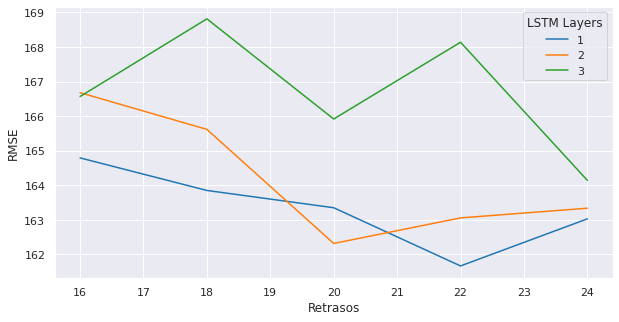

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Retrasos', y='RMSE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=0, estimator=np.min)

### Número de neuronas

El mejor número de neuronas fue 100.

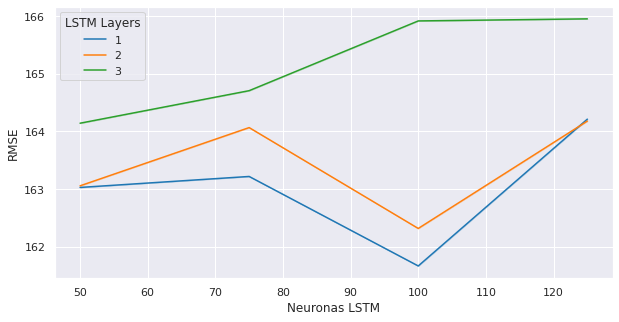

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Neuronas LSTM', y='RMSE',hue='LSTM Layers',palette='tab10',ci=0, estimator=np.min)

### Batch size

El mejor batch size fue de 50.

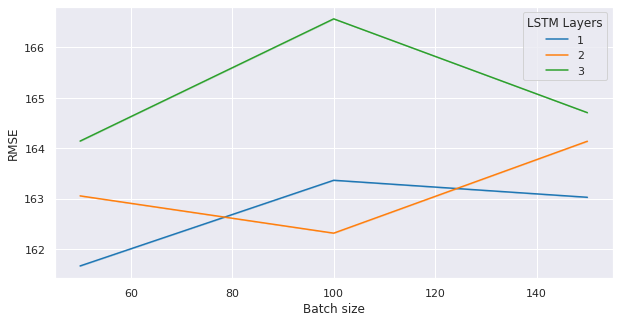

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Batch size', y='RMSE',hue='LSTM Layers',palette='tab10',ci=0, estimator=np.min)

## Conclusiones

* El modelo que tiene 3 capas LSTM funciona peor que los otros dos.
* El mejor modelo debe tener 1 capa LSTM.
* El mejor número de neuronas es 100.
* El batch size óptimo se encuentra en 50.
* El mejor número de retrasos es 22.